In [2]:
%load_ext autoreload
%autoreload 2

from Benchmark import Warehouse
from Visualisations import Vis
from GlobalObjs.GraphNX import GridGraph, plot_graph
from networkx.algorithms.traversal.breadth_first_search import bfs_tree
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


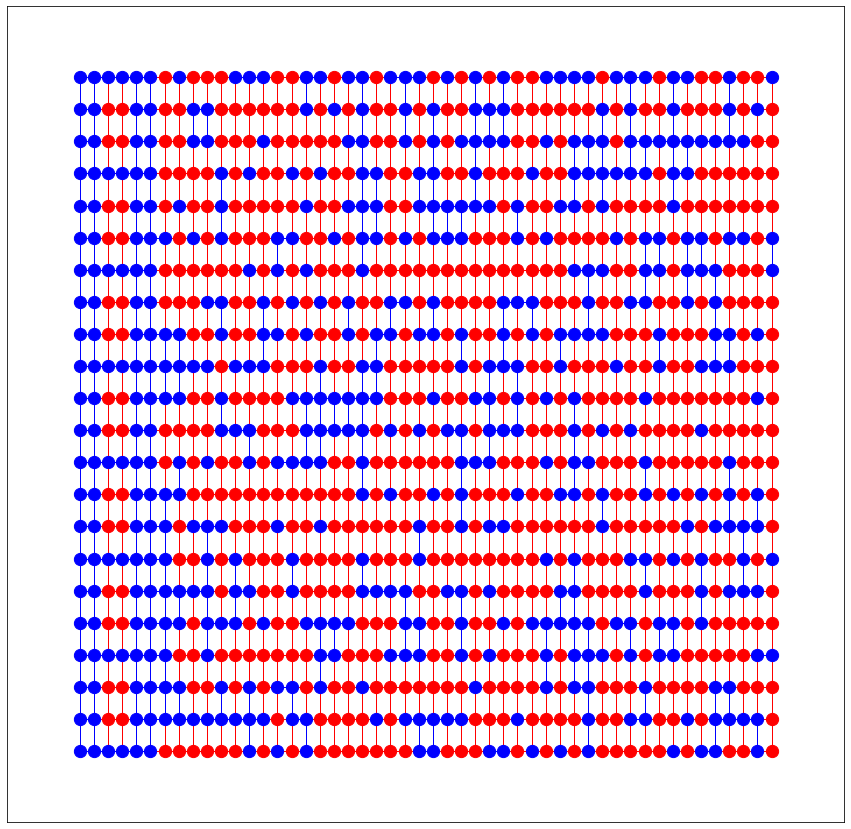

In [6]:
rand_grid = Warehouse.get_uniform_random_grid((22, 44), 560)
# rand_grid
grid_graph = GridGraph(rand_grid, only_full_G=True)
G = grid_graph.get_full_G()
plot_graph(G)

In [ ]:
vis = VisGrid(grid, (800, 400), 25, tick_time=0.2)
# vis.

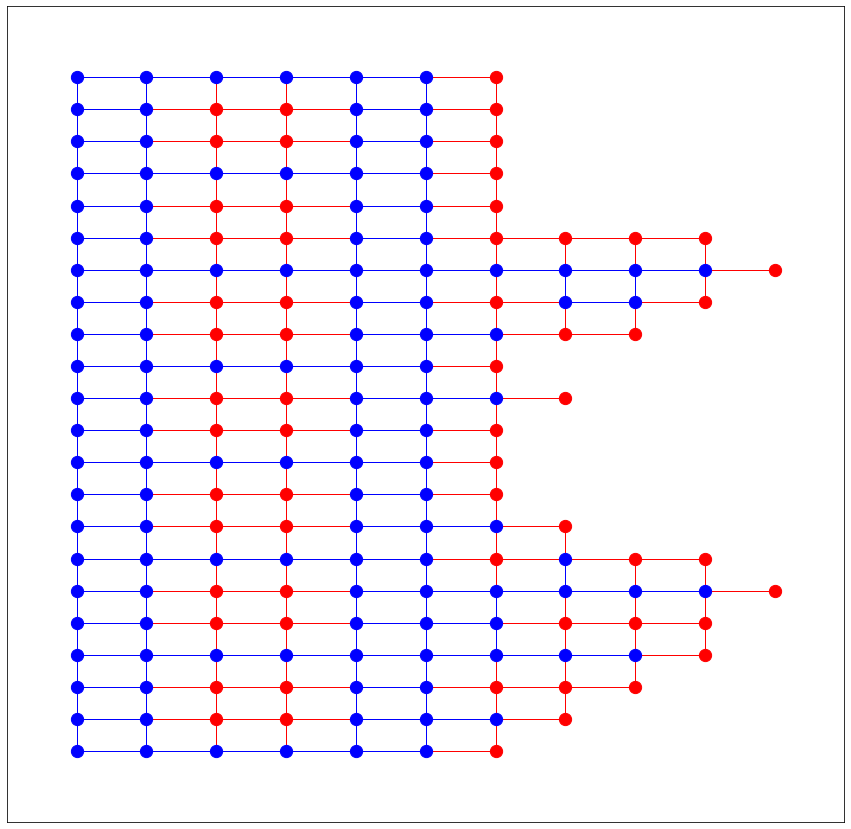

In [5]:
grid_graph.remove_non_reachable()
new_G = grid_graph.get_full_G()
plot_graph(new_G)

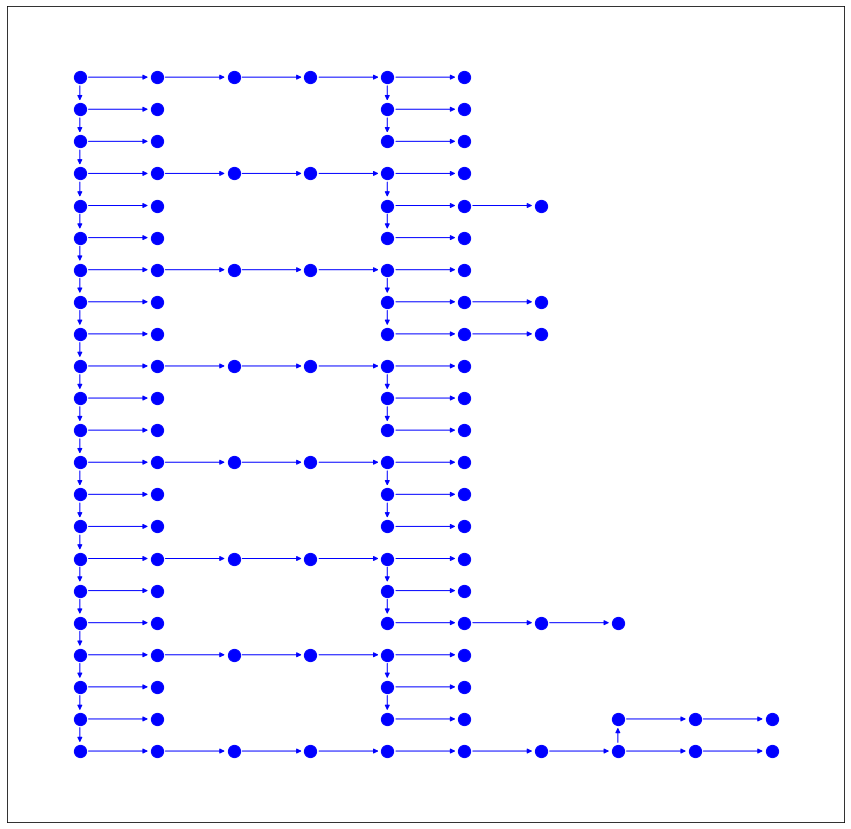

In [20]:
tmp_G = G.copy()
obstructed_nodes = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if is_obstructed]
tmp_G.remove_nodes_from(obstructed_nodes)
bfs_G = bfs_tree(tmp_G, (0, 0))
plot_graph(bfs_G)

In [21]:
rand_start_x = 6

In [22]:
storage_locs = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if is_obstructed and x>=rand_start_x]
orig_storage_loc_no = len(storage_locs)
orig_storage_loc_no

560

In [23]:
free_locs = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if not is_obstructed and x>=rand_start_x]
len(free_locs)

408

In [24]:
unreachable_storage_locs = []
for storage_loc in storage_locs:
    is_unreachable = True
    for neighbor in G.neighbors(storage_loc):
        if neighbor in bfs_G.nodes:
            is_unreachable = False
            break
    if is_unreachable:
        unreachable_storage_locs.append(storage_loc)

In [25]:
unreachable_free_locs = list(set(free_locs) - set(bfs_G.nodes))
len(unreachable_free_locs)

396

In [26]:
orig_storage_loc_no - len(unreachable_storage_locs)

28

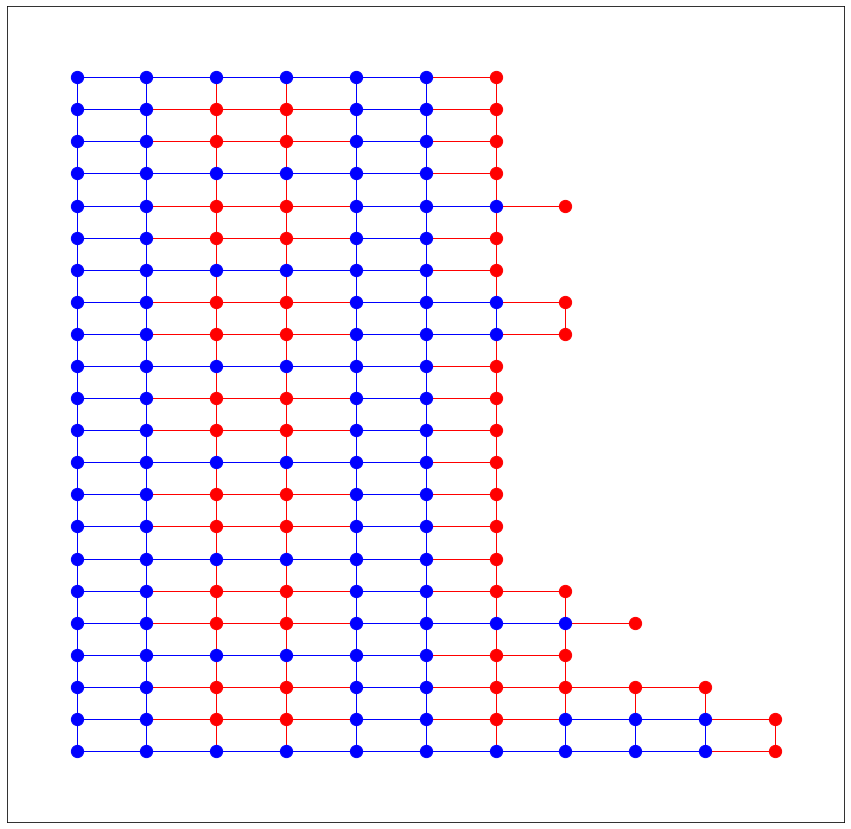

In [27]:
tmp_G = G.copy()
tmp_G.remove_nodes_from(unreachable_storage_locs)
tmp_G.remove_nodes_from(unreachable_free_locs)
plot_graph(tmp_G)

In [92]:
rand_grid = Warehouse.get_uniform_random_grid((22, 44), 400) # 560)
# rand_grid
grid_graph = GridGraph(rand_grid, only_full_G=True)
G = grid_graph.get_full_G()
# plot_graph(G)

tmp_G = G.copy()
obstructed_nodes = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if is_obstructed]
tmp_G.remove_nodes_from(obstructed_nodes)
bfs_G = bfs_tree(tmp_G, (0, 0))

rand_start_x = 6

storage_locs = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if is_obstructed and x>=rand_start_x]
orig_storage_loc_no = len(storage_locs)

free_locs = [(y,x) for (y,x), is_obstructed in G.nodes(data="obstructed") 
                if not is_obstructed and x>=rand_start_x]

unreachable_storage_locs = []
for storage_loc in storage_locs:
    is_unreachable = True
    for neighbor in G.neighbors(storage_loc):
        if neighbor in bfs_G.nodes:
            is_unreachable = False
            break
    if is_unreachable:
        unreachable_storage_locs.append(storage_loc)
        
unreachable_free_locs = list(set(free_locs) - set(bfs_G.nodes))
# print(len(unreachable_free_locs)
print(orig_storage_loc_no - len(unreachable_storage_locs))

315


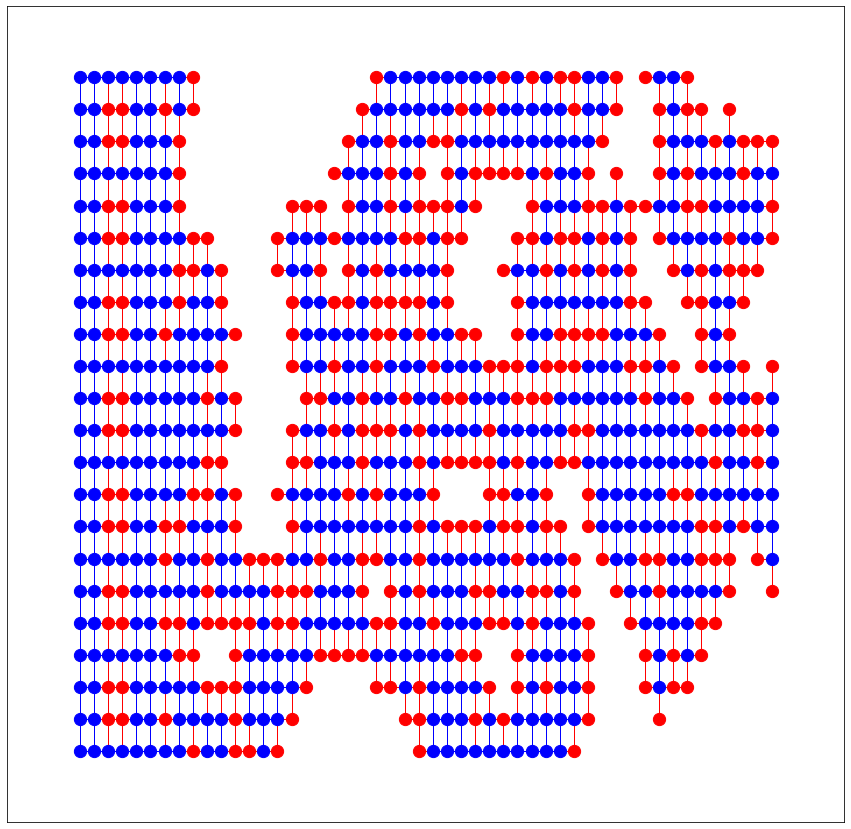

In [93]:
tmp_G = G.copy()
tmp_G.remove_nodes_from(unreachable_storage_locs)
tmp_G.remove_nodes_from(unreachable_free_locs)
plot_graph(tmp_G)